In [65]:
import numpy as np
import pandas as pd

# Open the zip into the dataset folder if this does not work for you

df = pd.read_csv('./dataset/Impact_of_Remote_Work_on_Mental_Health.csv')

# Display general information about the dataset
display(df.info())
display(df.describe())
display(df.head())
display(df.tail())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

None

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia
4999,EMP5000,29,Male,HR,IT,30,Onsite,20,15,1,Low,Depression,Yes,No Change,3,Unsatisfied,5,NaN,Poor,Asia


In [ ]:
#### Data preprocessing ####
import matplotlib.pyplot as plt
import seaborn as sns

# Label encoding #
df = df.drop('Employee_ID', axis=1) # Employee_ID is just another index, we dont need.

# Features that are just categories, dont have hierarchical values
categorical_features = ['Gender', 'Job_Role', 'Industry', 'Work_Location', 
                        'Mental_Health_Condition', 'Access_to_Mental_Health_Resources', 
                        'Region', 'Stress_Level', 'Satisfaction_with_Remote_Work', 
                        'Sleep_Quality', 'Company_Support_for_Remote_Work', 'Productivity_Change', 'Physical_Activity']

# Loop through each categorical feature and display its unique categories so we can make an accurate category mapping
for feature in categorical_features:
    if feature in df.columns:
        unique_values = df[feature].unique() # Get the unique categories available for each feature
        print(f"Unique categories for '{feature}': {unique_values}\n")

# Define mappings for each categorical feature
mappings = {
    'Gender': {
        'Non-binary': 0, 
        'Female': 1, 
        'Male': 2, 
        'Prefer not to say': 3
    },
    'Job_Role': {
        'HR': 0, 
        'Data Scientist': 1, 
        'Software Engineer': 2, 
        'Sales': 3, 
        'Marketing': 4, 
        'Designer': 5,
        'Project Manager': 6
    },
    'Industry': {
        'Healthcare': 0, 
        'IT': 1, 
        'Education': 2, 
        'Finance': 3, 
        'Consulting': 4, 
        'Manufacturing': 5,
        'Retail': 6
    },
    'Work_Location': {
        'Hybrid': 0, 
        'Remote': 1, 
        'Onsite': 2
    },
    'Mental_Health_Condition': { # Our target vairable
        'Depression': 0, 
        'Anxiety': 1, 
        'Burnout': 2, 
        np.nan: 3  # Encoding NaN as a separate category - means no mental health condition reported
    },
    'Access_to_Mental_Health_Resources': {
        'No': 0, 
        'Yes': 1
    },
    'Region': {
        'Europe': 0, 
        'Asia': 1, 
        'North America': 2, 
        'South America': 3, 
        'Oceania': 4, 
        'Africa': 5
    },
    'Stress_Level': {
        'Low': 0, 
        'Medium': 1, 
        'High': 2
    },
    'Satisfaction_with_Remote_Work': {
        'Unsatisfied': 0, 
        'Neutral': 1, 
        'Satisfied': 2
    },
    'Sleep_Quality': {
        'Poor': 0, 
        'Average': 1, 
        'Good': 2
    },
    'Company_Support_for_Remote_Work': {
        1: 0, 
        2: 1, 
        3: 2, 
        4: 3, 
        5: 4
    },
    'Productivity_Change': {
        'Decrease': 0, 
        'No Change': 1, 
        'Increase': 2
    },
    'Physical_Activity': {
        'Daily': 0, 
        'Weekly': 1, 
        np.nan: 2 
    }
}

# Step 2: Apply the mappings to the DataFrame
for column, mapping in mappings.items():
    if column in df.columns:
        df[column] = df[column].map(mapping)

# If youre wondering why I did a manual mapping instead of using LabelEncoder, its because I tried LabelEncoder and its labels didn't make sense. They didn't follow the heirarchy of the categories.
print('Here is the dataset after label encoding:')
display(df)

Unique categories for 'Gender': ['Non-binary' 'Female' 'Male' 'Prefer not to say']

Unique categories for 'Job_Role': ['HR' 'Data Scientist' 'Software Engineer' 'Sales' 'Marketing' 'Designer'
 'Project Manager']

Unique categories for 'Industry': ['Healthcare' 'IT' 'Education' 'Finance' 'Consulting' 'Manufacturing'
 'Retail']

Unique categories for 'Work_Location': ['Hybrid' 'Remote' 'Onsite']

Unique categories for 'Mental_Health_Condition': ['Depression' 'Anxiety' nan 'Burnout']

Unique categories for 'Access_to_Mental_Health_Resources': ['No' 'Yes']

Unique categories for 'Region': ['Europe' 'Asia' 'North America' 'South America' 'Oceania' 'Africa']

Unique categories for 'Stress_Level': ['Medium' 'High' 'Low']

Unique categories for 'Satisfaction_with_Remote_Work': ['Unsatisfied' 'Satisfied' 'Neutral']

Unique categories for 'Sleep_Quality': ['Good' 'Poor' 'Average']

Unique categories for 'Company_Support_for_Remote_Work': [1 2 5 3 4]

Unique categories for 'Productivity_Change': 

,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,32,0,0,0,13,0,47,7,2,1,0,0,0,1,0,0,1,2,0
1,40,1,1,1,3,1,52,4,1,1,1,0,2,3,2,1,1,2,1
2,59,0,2,2,22,0,46,11,5,1,1,0,1,4,0,4,2,0,2
3,27,2,2,3,20,2,32,8,4,2,0,1,2,3,0,2,2,0,0
4,49,2,3,4,32,2,35,12,2,2,3,1,0,3,0,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,2,3,4,4,2,24,2,5,2,2,1,0,4,1,0,1,1,1
4996,39,1,3,0,27,2,48,15,1,0,0,1,0,1,2,0,2,1,5
4997,42,1,3,0,21,0,34,1,4,2,2,0,2,3,2,0,0,0,4
4998,27,1,3,0,26,1,58,0,5,0,3,1,2,3,0,3,0,1,1


Here is the correlation heatmap:


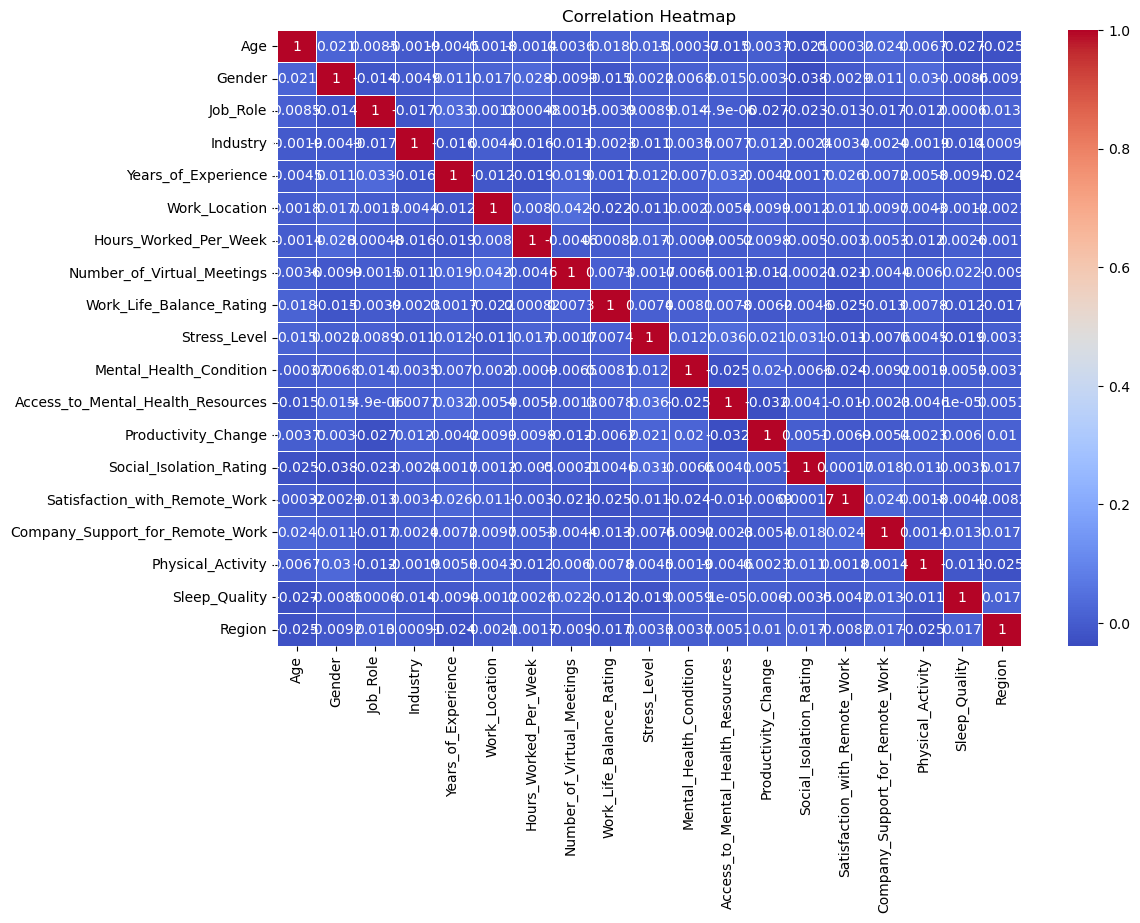

There are no significant correlations, we will have to base our feature selection on a different methods


In [67]:
# Check for multicolinarity (Mohand):

# We will check for multicolinearity using a correlation matrix heatmap
correlation_matrix = df.corr()

print('Here is the correlation heatmap:')
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
print('There are no significant correlations, we will have to base our feature selection on a different methods')

Line plot visualizations:


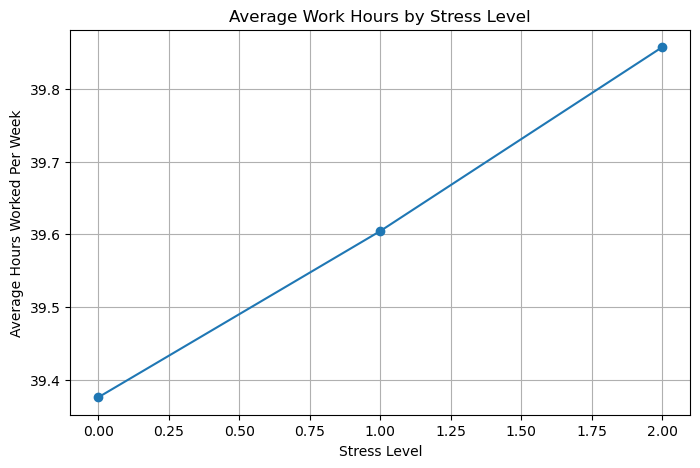

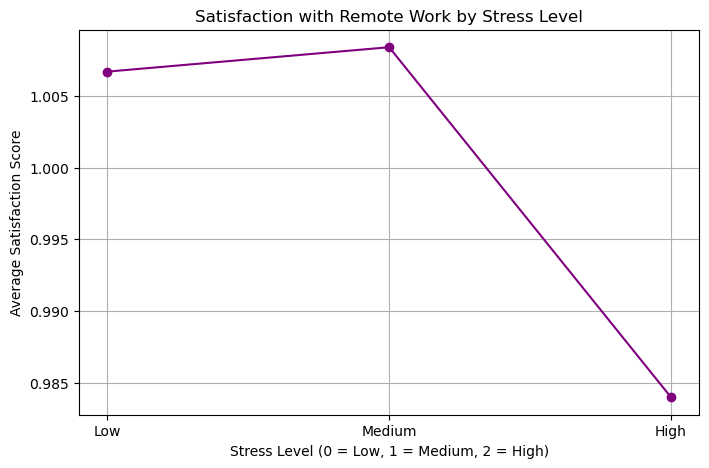

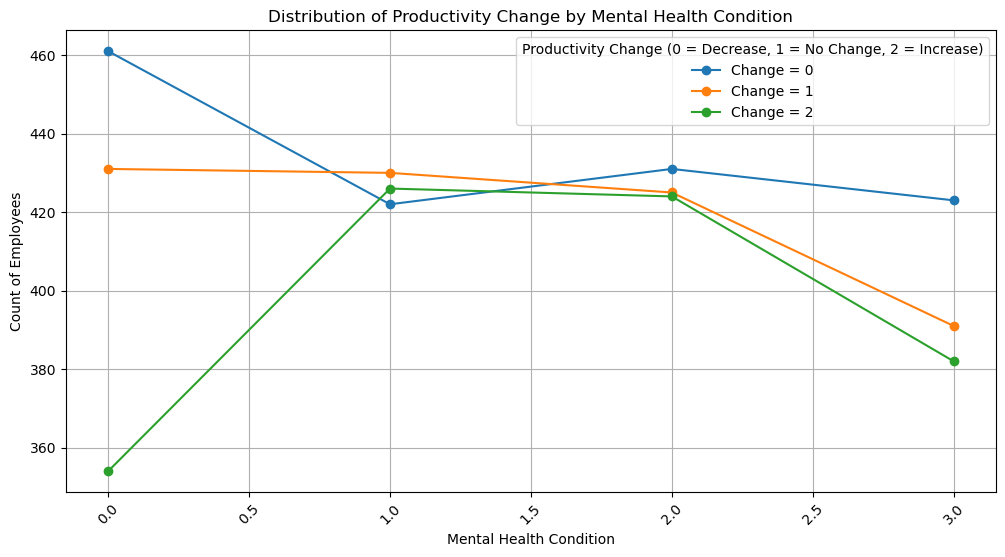

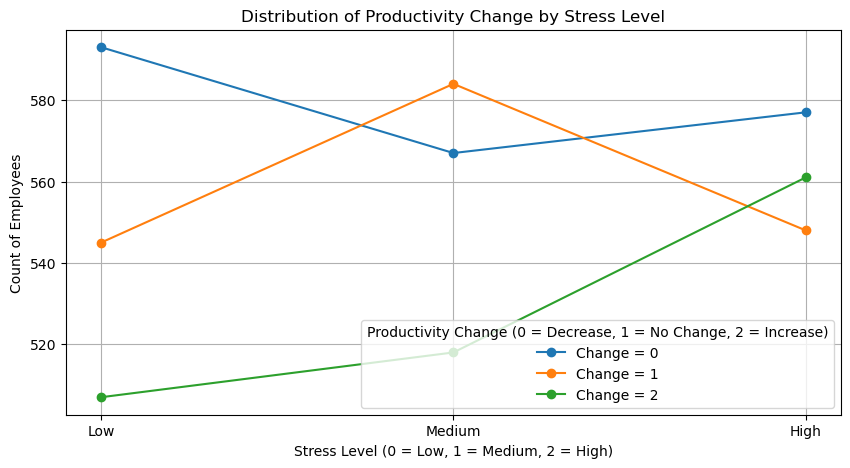

Area plot visualizations:


<Figure size 1000x600 with 0 Axes>

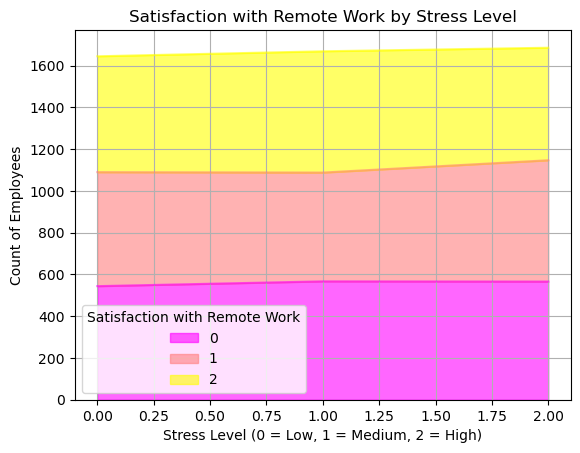

<Figure size 1000x600 with 0 Axes>

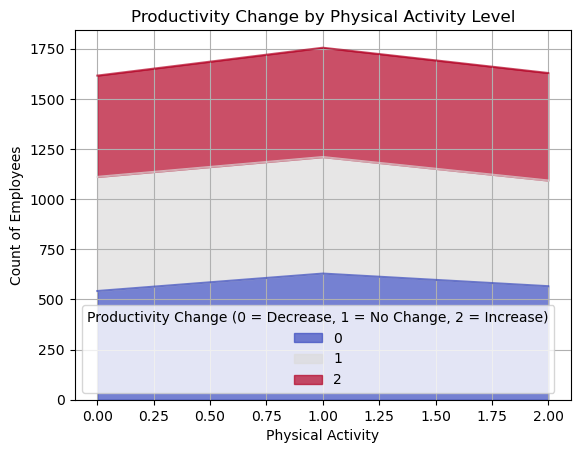

In [68]:
### Data Visualization ###

# Line graphs (Mohand):

print('Line plot visualizations:')

# Line graph for Average Work Hours by Stress Level
# Group by Stress Level and calculate the average Hours Worked Per Week
avg_hours_by_stress = df.groupby('Stress_Level')['Hours_Worked_Per_Week'].mean()

plt.figure(figsize=(8, 5))
plt.plot(avg_hours_by_stress.index, avg_hours_by_stress.values, marker='o')
plt.title('Average Work Hours by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Average Hours Worked Per Week')
plt.grid(True)
plt.show()

# Line graph for Satisfaction with Remote Work by Stress Level
# Group by Stress Level and Satisfaction with Remote Work
satisfaction_by_stress = df.groupby('Stress_Level')['Satisfaction_with_Remote_Work'].mean()

plt.figure(figsize=(8, 5))
plt.plot(satisfaction_by_stress.index, satisfaction_by_stress.values, marker='o', linestyle='-', color='purple')
plt.title('Satisfaction with Remote Work by Stress Level')
plt.xlabel('Stress Level (0 = Low, 1 = Medium, 2 = High)')
plt.ylabel('Average Satisfaction Score')
plt.xticks(ticks=[0, 1, 2], labels=['Low', 'Medium', 'High'])
plt.grid(True)
plt.show()

# Line graph for Productivity Change by Mental Health Condition
# Group by Mental Health Condition and count for each Productivity Change
condition_productivity_distribution = df.groupby('Mental_Health_Condition')['Productivity_Change'].value_counts().unstack(fill_value=0)

# Plot the line graph for each Productivity Change category
plt.figure(figsize=(12, 6))
for change in condition_productivity_distribution.columns:
    plt.plot(condition_productivity_distribution.index, condition_productivity_distribution[change], marker='o', label=f'Change = {change}')

plt.title('Distribution of Productivity Change by Mental Health Condition')
plt.xlabel('Mental Health Condition')
plt.ylabel('Count of Employees')
plt.xticks(rotation=45)
plt.legend(title='Productivity Change (0 = Decrease, 1 = No Change, 2 = Increase)')
plt.grid(True)
plt.show()

# Line graph for Productivity Change by Physical Activity Level
# Group by Stress Level and count for of each Productivity Change
stress_productivity_distribution = df.groupby('Stress_Level')['Productivity_Change'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(10, 5))
for change in stress_productivity_distribution.columns:
    plt.plot(stress_productivity_distribution.index, stress_productivity_distribution[change], marker='o', label=f'Change = {change}')

plt.title('Distribution of Productivity Change by Stress Level')
plt.xlabel('Stress Level (0 = Low, 1 = Medium, 2 = High)')
plt.ylabel('Count of Employees')
plt.xticks(ticks=[0, 1, 2], labels=['Low', 'Medium', 'High'])
plt.legend(title='Productivity Change (0 = Decrease, 1 = No Change, 2 = Increase)')
plt.grid(True)
plt.show()


# Area charts (Mohand):

print('Area plot visualizations:')
# Area chart for Average Work Hours by Stress Level
# Group by Stress Level and Satisfaction with Remote Work
satisfaction_by_stress = df.groupby('Stress_Level')['Satisfaction_with_Remote_Work'].value_counts().unstack().fillna(0)

plt.figure(figsize=(10, 6))
satisfaction_by_stress.plot(kind='area', stacked=True, alpha=0.6, cmap='spring')
plt.title('Satisfaction with Remote Work by Stress Level')
plt.xlabel('Stress Level (0 = Low, 1 = Medium, 2 = High)')
plt.ylabel('Count of Employees')
plt.grid(True)
plt.legend(title='Satisfaction with Remote Work')
plt.show()

# Area chart for Productivity Change by Physical Activity Level
# Group by Physical Activity and count Productivity Change occurrences
productivity_by_activity = df.groupby('Physical_Activity')['Productivity_Change'].value_counts().unstack().fillna(0)

plt.figure(figsize=(10, 6))
productivity_by_activity.plot(kind='area', stacked=True, alpha=0.7, cmap='coolwarm')
plt.title('Productivity Change by Physical Activity Level')
plt.xlabel('Physical Activity')
plt.ylabel('Count of Employees')
plt.grid(True)
plt.legend(title='Productivity Change (0 = Decrease, 1 = No Change, 2 = Increase)')
plt.show()

